In [38]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

Simulacion uav control discreto

In [39]:
# tiempo de muestreo [segundos]
Ts = 0.01

In [40]:
class uav_class:
    # define class
    def __init__(self, x0 = 0, x0_dot = 0, u_lim = 0.1):
        self.x = x0
        self.x_dot = x0_dot
        self.u_lim = u_lim

    def next(self, u, Ts):
        self.x = self.x + self.x_dot*Ts
        self.x_dot = self.x_dot + u*Ts; 

    def limita_u(self, u):
        uOut = u
        if abs(uOut)>self.u_lim:
            uOut = np.sign(uOut)*self.u_lim
            
        return uOut

    def control_x(self, x_req, K, Ts):
        u = 0.0
        e_x = self.x - x_req
        uTs = -self.x_dot -K*(e_x + self.x_dot*Ts) 
        u = uTs/Ts
        u = self.limita_u(u)
        return u

    def disp(self):
        print ('x=%.02f' % self.x, ', x_dot=%.02f' % self.x_dot)


In [26]:
N = 2000
x     = np.zeros((N,1), dtype=float)
x_dot = np.zeros((N,1), dtype=float)
x_req = np.zeros((N,1), dtype=float)
u = np.zeros((N,1), dtype=float)

In [37]:
#crea un objeto uav con valores inciailes
U = 0.2
uav = uav_class(0,0, U)
print('x {:.3f}'.format(uav.x))

x 0.000


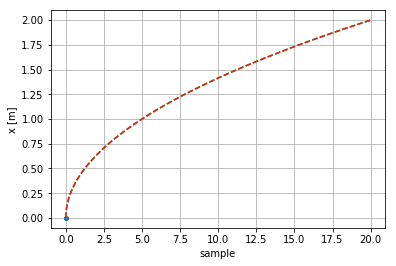

In [14]:
U = 0.1;
x0_list = [1, 10, 20]

plt.plot(x,x_dot,'.-')


for x0 in x0_list:
    
    for k in range(0,x.size-1):
        x[k+1]     = x[k] + Ts*x_dot[k]
        x_dot[k+1] = x_dot[k] + Ts * U

    plt.plot(x,x_dot,'--')

# posicion    
plt.xlabel('sample')
plt.ylabel('x [m]')
plt.grid()
# plt.xlim([0, 1])
plt.draw()
plt.savefig('test_1.png')


In [15]:
x0

20

In [16]:
for k in x0:
    print(k)

TypeError: 'int' object is not iterable